# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kevin Chritian Sepoetro
- **Email:** 71210797@students.ukdw.ac.id
- **ID Dicoding:** Kevin Christian Sepoetro


## Menentukan Pertanyaan Bisnis

1. bagaimana hasil kondisi bersepeda pada saat Working day dan tidak Working day ?
2. Apakah ada setiap Cuaca mempengaruhi penggunaan sepeda ?
3. Bagaimana survey penggunaan sepda antara tahun 2011 dan tahun 2012 ?

## Import Semua Packages/Library yang Digunakan

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [225]:
day_df =pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [226]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [227]:
# Karena informasi seperti yr, hr membuat bingung, saya akan mengganti sesuai di notepad
# Ganti setiap keterangan agar jelas
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [228]:
# Ganti setiap keterangan agar jelas
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'hr': 'hour',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [229]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            731 non-null    int64  
 1   date               731 non-null    object 
 2   season             731 non-null    int64  
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   holiday            731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   workingday         731 non-null    int64  
 8   weather_condition  731 non-null    int64  
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  hum                731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  count              731 non-null    int64  
dtypes: float64(4), int64(11), 

In [230]:
# hasil diatas tidak ada yg Nan atau missing value tetapi kesalahan tipe data pada date

In [231]:
day_df.isna().sum()

instant              0
date                 0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
hum                  0
windspeed            0
casual               0
registered           0
count                0
dtype: int64

In [232]:
# Mencari jum duplikat:
print("jumlah duplikat : ", day_df.duplicated().sum())

jumlah duplikat :  0


In [233]:
# Selanjutnya menggunakan method describe() unutk melihat nilai Mean Median, dll
day_df.describe()

,instant,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [234]:
# hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            17379 non-null  int64  
 1   date               17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  hum                17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  count              173

In [235]:
# Tipe data date juga salah

In [236]:
# Mencari jum duplikat:
print("jumlah duplikat : ", hour_df.duplicated().sum())

jumlah duplikat :  0


In [237]:
hour_df.isna().sum()

instant              0
date                 0
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
hum                  0
windspeed            0
casual               0
registered           0
count                0
dtype: int64

In [238]:
# Selanjutnya menggunakan method describe() unutk melihat nilai Mean Median, dll
hour_df.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [239]:
# Ubah tipe data pada day_df
datetime_columns = ["date"]
 
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [240]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    int64         
 3   year               731 non-null    int64         
 4   month              731 non-null    int64         
 5   holiday            731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   workingday         731 non-null    int64         
 8   weather_condition  731 non-null    int64         
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  hum                731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

In [241]:
# Ubah Tipe data pada hour_day 
# Ubah tipe data pada day_df
datetime_columns = ["date"]
 
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [242]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   workingday         17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  hum                17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [243]:
# semua telah selesai, tetapi ssaya ingin mengganti seperti month yg mewakili angka diganti string, dan lain lain.

# Berikut adalah isi dari notepad :
	# - instant: record index
	# - dteday : date
	# - season : season (1:springer, 2:summer, 3:fall, 4:winter)
	# - yr : year (0: 2011, 1:2012)
	# - mnth : month ( 1 to 12)
	# - hr : hour (0 to 23)
	# - holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	# - weekday : day of the week
	# - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	# + weathersit : 
	# 	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	# 	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	# 	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	# 	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	# - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	# - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	# - hum: Normalized humidity. The values are divided to 100 (max)
	# - windspeed: Normalized wind speed. The values are divided to 67 (max)
	# - casual: count of casual users
	# - registered: count of registered users
	# - cnt: count of total rental bikes including both casual and registered

In [244]:
day_df['month'] = day_df['month'].apply(lambda x: 'Januari' if x == 1 else (
                                    'Februari' if x == 2 else (
                                    'Maret' if x == 3 else (
                                    'April' if x == 4 else (
                                    'Mei' if x == 5 else (
                                    'Juni' if x == 6 else (
                                    'Juli' if x == 7 else (
                                    'Agustus' if x == 8 else (
                                    'September' if x == 9 else (
                                    'Oktober' if x == 10 else (
                                    'November' if x == 11 else 'Desember')))))))))))
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,Januari,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,Januari,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,Januari,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,Januari,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,Januari,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [245]:
day_df['season'] = day_df['season'].apply(lambda x: 'Spring' if x == 1 else (
                                               'Summer' if x == 2 else (
                                               'Fall' if x == 3 else 'Winter')))
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Januari,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Januari,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Januari,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Januari,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Januari,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [246]:
day_df['weekday'] = day_df['weekday'].apply(lambda x: 'Minggu' if x == 0 else (
                                               'Senin' if x == 1 else (
                                               'Selasa' if x == 2 else (
                                               'Rabu' if x == 3 else (
                                               'kamis' if x == 4 else (
                                               'Jumat' if x == 5 else 'Sabtu'))))))
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Januari,0,Sabtu,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Januari,0,Minggu,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Januari,0,Senin,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Januari,0,Selasa,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Januari,0,Rabu,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [247]:
day_df['weather_condition'] = day_df['weather_condition'].apply(lambda x: 'Clear/Partly Cloudy' if x == 1 else (
                                                            'Misty/Cloudy' if x == 2 else (
                                                            'Light Snow/Rain' if x == 3 else 'Severe Weather')))
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Januari,0,Sabtu,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Januari,0,Minggu,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Januari,0,Senin,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Januari,0,Selasa,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Januari,0,Rabu,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [248]:
day_df['workingday'] = day_df['workingday'].apply(lambda x: 'not working' if x == 0 else 'working')
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Januari,0,Sabtu,not working,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Januari,0,Minggu,not working,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Januari,0,Senin,working,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Januari,0,Selasa,working,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Januari,0,Rabu,working,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [249]:
# Unutk hour_df
hour_df['month'] = hour_df['month'].apply(lambda x: 'Januari' if x == 1 else (
                                    'Februari' if x == 2 else (
                                    'Maret' if x == 3 else (
                                    'April' if x == 4 else (
                                    'Mei' if x == 5 else (
                                    'Juni' if x == 6 else (
                                    'Juli' if x == 7 else (
                                    'Agustus' if x == 8 else (
                                    'September' if x == 9 else (
                                    'Oktober' if x == 10 else (
                                    'November' if x == 11 else 'Desember')))))))))))
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,Januari,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,Januari,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,Januari,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,Januari,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,Januari,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [250]:
hour_df['season'] = hour_df['season'].apply(lambda x: 'Spring' if x == 1 else (
                                               'Summer' if x == 2 else (
                                               'Fall' if x == 3 else 'Winter')))
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Januari,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Januari,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Januari,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Januari,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Januari,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [251]:
hour_df['weekday'] = hour_df['weekday'].apply(lambda x: 'Minggu' if x == 0 else (
                                               'Senin' if x == 1 else (
                                               'Selasa' if x == 2 else (
                                               'Rabu' if x == 3 else (
                                               'kamis' if x == 4 else (
                                               'Jumat' if x == 5 else 'Sabtu'))))))
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Januari,0,0,Sabtu,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Januari,1,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Januari,2,0,Sabtu,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Januari,3,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Januari,4,0,Sabtu,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [252]:
hour_df['weather_condition'] = hour_df['weather_condition'].apply(lambda x: 'Clear/Partly Cloudy' if x == 1 else (
                                                            'Misty/Cloudy' if x == 2 else (
                                                            'Light Snow/Rain' if x == 3 else 'Severe Weather')))
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Januari,0,0,Sabtu,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Januari,1,0,Sabtu,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Januari,2,0,Sabtu,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Januari,3,0,Sabtu,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Januari,4,0,Sabtu,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [253]:
hour_df['workingday'] = hour_df['workingday'].apply(lambda x: 'not working' if x == 0 else 'working')
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Januari,0,0,Sabtu,not working,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Januari,1,0,Sabtu,not working,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Januari,2,0,Sabtu,not working,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Januari,3,0,Sabtu,not working,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Januari,4,0,Sabtu,not working,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

Day_df

In [254]:
# Unutk day df berdasarkan bulan
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
            max   min         mean     sum
month                                     
Agustus    7865  1115  5664.419355  351194
April      7460   795  4484.900000  269094
Desember   6606   441  3403.806452  211036
Februari   5062  1005  2655.298246  151352
Januari    4521   431  2176.338710  134933
Juli       8173  3285  5563.677419  344948
Juni       8120  3767  5772.366667  346342
Maret      8362   605  3692.258065  228920
Mei        8294  2633  5349.774194  331686
November   6852  1495  4247.183333  254831
Oktober    8156    22  5199.225806  322352
September  8714  1842  5766.516667  345991

In [255]:
# dapat dilihat rata rata bulan yg sering menggunakan sepeda bulan Juni dan paling rendah bulan januari

In [256]:
# selanjutnya kita lihat berdasarkan kondisi cuaca
day_df.groupby(by='weather_condition').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_condition                                   
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

In [257]:
# Dari hasil tersebut ternyata kodisi cuaca Clear yg sering 

In [258]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean']
})

count                   
          max   min         mean
holiday                         
0        8714    22  4527.104225
1        7403  1000  3735.000000

In [259]:
# ternyata yg suka bersepeda adalah di hari libur

In [260]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
              max  min         mean
workingday                         
not working  8714  605  4330.168831
working      8362   22  4584.820000

In [261]:
# ternyata dari table diatas yg sebagian besar banyak working dari pada non woking

In [262]:
day_df.groupby(by='season').agg({
    'temp': ['min','max', 'mean'],
    'atemp': ['min','max', 'mean']
})

temp                         atemp                    
             min       max      mean       min       max      mean
season                                                            
Fall    0.469167  0.861667  0.706309  0.242400  0.840896  0.655898
Spring  0.059130  0.572500  0.297748  0.079070  0.548617  0.296914
Summer  0.253043  0.808333  0.544405  0.250339  0.757579  0.520307
Winter  0.220833  0.657500  0.422906  0.227913  0.607975  0.415539

In [263]:
# Ternyata yg suka kebanyak di season fall, kemudain summer, winter dan paling kecil adalah spring

Hour_df

In [264]:
# Unutk day df berdasarkan bulan
hour_df.groupby(by='month').agg({
    'count': ['min','max', 'mean', 'sum']
})

count                         
            min  max        mean     sum
month                                   
Agustus       1  941  238.097627  351194
April         1  822  187.260960  269094
Desember      1  759  142.303439  211036
Februari      1  610  112.865026  151352
Januari       1  559   94.424773  134933
Juli          1  913  231.819892  344948
Juni          1  900  240.515278  346342
Maret         1  957  155.410726  228920
Mei           1  873  222.907258  331686
November      1  729  177.335421  254831
Oktober       1  963  222.158511  322352
September     1  977  240.773138  345991

In [265]:
# selanjutnya kita lihat berdasarkan kondisi cuaca
hour_df.groupby(by='weather_condition').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                         
                      max min        mean      sum
weather_condition                                 
Clear/Partly Cloudy   977   1  204.869272  2338173
Light Snow/Rain       891   1  111.579281   158331
Misty/Cloudy          957   1  175.165493   795952
Severe Weather        164  23   74.333333      223

In [266]:
# trnyata yg suka bersepeda rata rata cuaca Clear

In [267]:
hour_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
          max min       mean      sum
holiday                              
0         977   1  190.42858  3214244
1         712   1  156.87000    78435

In [268]:
# Rata rata yg bersepeda jatuh di hari libur

In [269]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
              max  min         mean
workingday                         
not working  8714  605  4330.168831
working      8362   22  4584.820000

In [270]:
# Ternyata ini juga rata rata di working bersepeda

In [271]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean']
})

temp                         atemp                    
             max       min      mean       max       min      mean
season                                                            
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539

In [272]:
# Ternyata rata rata pada suka besepeda fall, summer, winter, dan terakhir spring.

In [273]:
# Karena dilihat hour_df dan day_df sama saja hasil EDA nya maka untuk
# visualisasi menggunakan salah satu yaitu day_df

## Visualization & Explanatory Analysis

### Pertanyaan 1:

1. bagaimana hasil kondisi bersepeda pada saat Working day dan tidak Working day ?

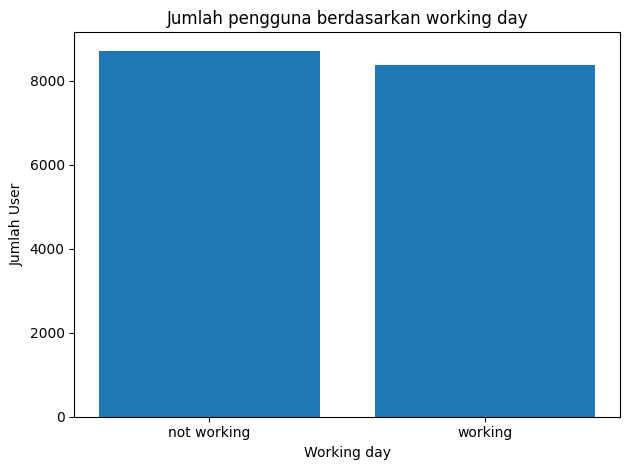

In [274]:
import matplotlib.pyplot as plt


# Plot bar
plt.bar(day_df['workingday'], day_df['count'])

plt.title('Jumlah pengguna berdasarkan working day')
plt.xlabel('Working day')
plt.ylabel('Jumlah User')
plt.tight_layout()
plt.show()


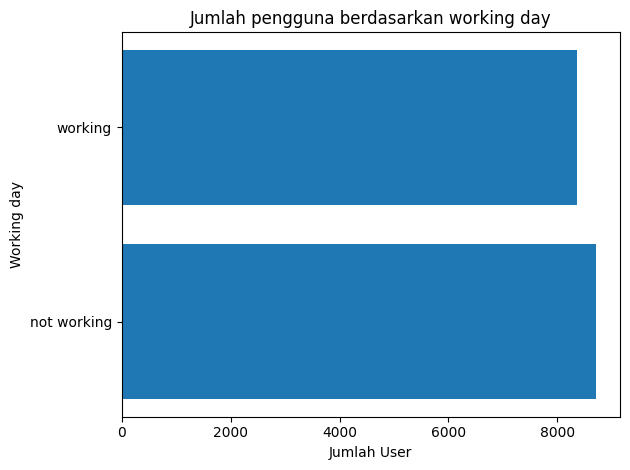

In [285]:
import matplotlib.pyplot as plt

# Plot bar horizontal
plt.barh(day_df['workingday'], day_df['count'])

plt.title('Jumlah pengguna berdasarkan working day')
plt.xlabel('Jumlah User')
plt.ylabel('Working day')
plt.tight_layout()
plt.show()


### Pertanyaan 2:

2. Apakah ada setiap Cuaca mempengaruhi penggunaan sepeda ?

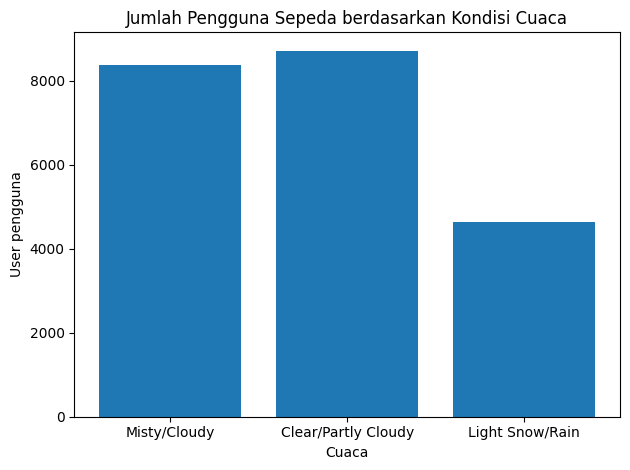

In [275]:
plt.bar(day_df['weather_condition'], day_df['count'])

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('User pengguna')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pertanyaan 3:

3. Bagaimana survey penggunaan sepda antara tahun 2011 dan tahun 2012 ?

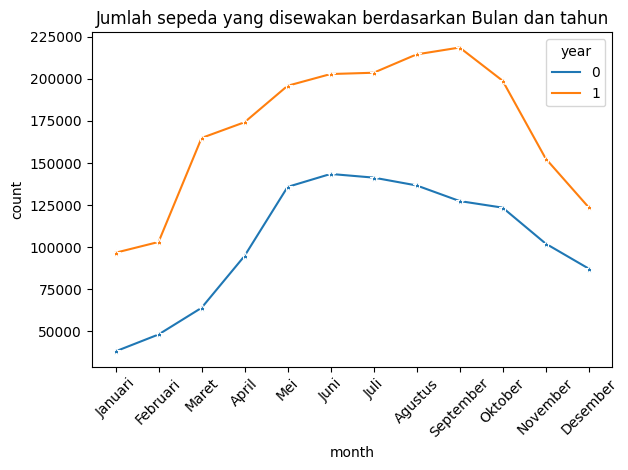

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mengubah kategori 'month' menjadi kategori terurut
day_df['month'] = pd.Categorical(day_df['month'], categories=['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'], ordered=True)

# Menghitung total sepeda yang disewakan per bulan dan tahun
bulan = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=bulan,
    x="month",
    y="count",
    hue="year",
    marker="*"
)

# Menyesuaikan label sumbu x
plt.xticks(rotation=45)


plt.title("Jumlah sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.tight_layout()
plt.show()

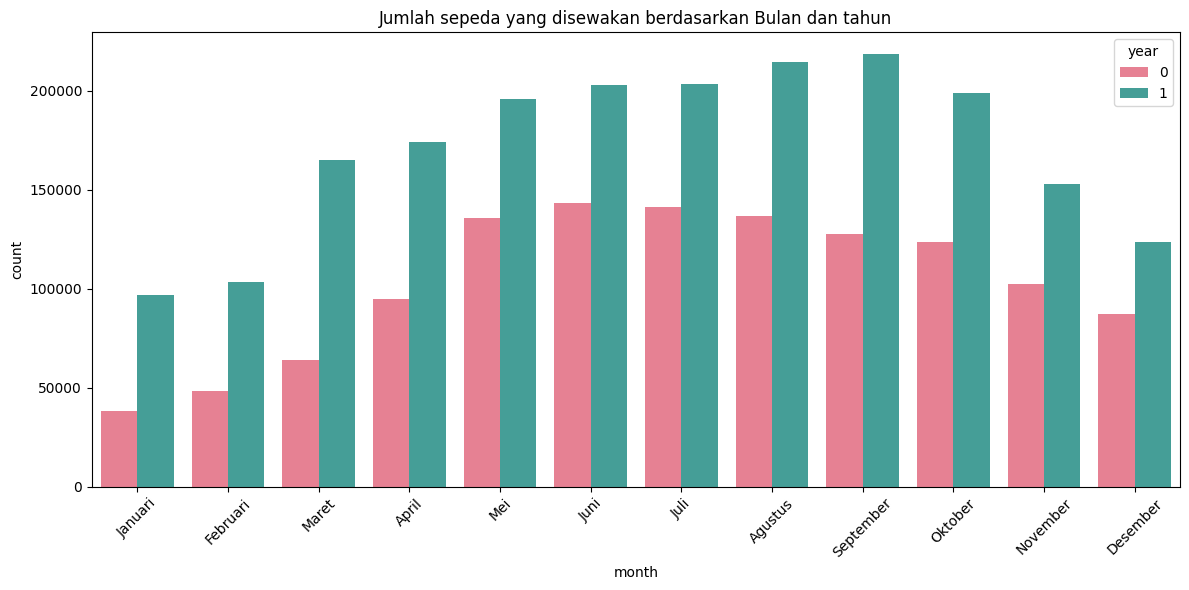

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mengubah kategori 'month' menjadi kategori terurut
day_df['month'] = pd.Categorical(day_df['month'], categories=['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember'], ordered=True)

# Menghitung total sepeda yang disewakan per bulan dan tahun
bulan = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(
    data=bulan,
    x="month",
    y="count",
    hue="year",
    palette="husl"
)

# Menyesuaikan label sumbu x
plt.xticks(rotation=45)

plt.title("Jumlah sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.tight_layout()
plt.show()


## Conclusion

- Conclusion 1 :
Dapat dilihat dari bar terebut bahwa sebagian besar menggunakan sepeda dilakukan di waktu pergi bekerja, dibandingkan dengan penggunaan sepeda pada waktu tidak bekerja / hari libur. Akan tetapi dari bar chart tersebut, selisih penggunaan sepeda pada hari libur dengan hari bekerja tidak terlalu jauh. Juga dapat dilihat pada EDA dimana rata rata pada day_df 4330.168831 tidak bekerja dan bekerja adalah 4584.820000.

- Conclution pertanyaan 2 :
Pada hasil visualisasi diatas dapat disimpulkan bahwa penyewa lebih suka Cuaca Clear. hal ini dapat terlihat jelas pada day_df EDA bahwa rata rata 
204.869272. lalu penyewa juga suka pada cuaca Cloudy dari pada Rain, hal ini dapat dilihat dari grafik dan Eda hasil rata rata yaitu 175.165493. Dan yg terakhir penyewa kurang suka Rain. dan rata rata nya adalah 111.579281.

- Conclution 3:
Dapat dilihat pada hasil grafik visualisasi. terdapat perbedaan anatara tahun 2011 dan 2012. pada tahun 2011, bulan Juni sebagai puncak penyewaan sepeda(sangat ramai). sedangkan tahun 2012 puncak nya September. 2012(orange line atau oleh angka 1). 2011, (blue line, atau angka 0)


In [279]:
day_df.to_csv("day_data.csv", index=False)